In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly ,plot_components_plotly
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [2]:
# read csv file
df = pd.read_csv('../Dataset/WHO-COVID-19-germany-usa-india-data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
0,1/3/2020,DE,Germany,EURO,0,0
1,1/4/2020,DE,Germany,EURO,1,1
2,1/5/2020,DE,Germany,EURO,0,1
3,1/6/2020,DE,Germany,EURO,0,1
4,1/7/2020,DE,Germany,EURO,0,1


In [3]:
# Get the shape of dataframe
df.shape


(3189, 6)

# Data Preprocessing

In [4]:
# count NAN values
count_nan = df.isna().sum()
print(count_nan)

Date_reported       0
Country_code        0
Country             0
WHO_region          0
New_cases           0
Cumulative_cases    0
dtype: int64


In [5]:
# calculate duplicates
dups = df.duplicated()
# report if there any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Date_reported, Country_code, Country, WHO_region, New_cases, Cumulative_cases]
Index: []


In [6]:
# check data types
df.dtypes

Date_reported       object
Country_code        object
Country             object
WHO_region          object
New_cases            int64
Cumulative_cases     int64
dtype: object

In [7]:
# change timestamp data types string to datetime
df['Date_reported'] = pd. to_datetime(df['Date_reported'])

In [8]:
# check data types
df.dtypes

Date_reported       datetime64[ns]
Country_code                object
Country                     object
WHO_region                  object
New_cases                    int64
Cumulative_cases             int64
dtype: object

In [9]:
# Get the unique values of the 'Country' column
countries = df['Country'].unique()
print(countries)

['Germany' 'India' 'United States of America']


In [10]:
# Filter the dataframe to only include rows where the 'Country' column is 'Germany'
df_germany = df[df['Country'] == 'Germany']
df_germany.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
0,2020-01-03,DE,Germany,EURO,0,0
1,2020-01-04,DE,Germany,EURO,1,1
2,2020-01-05,DE,Germany,EURO,0,1
3,2020-01-06,DE,Germany,EURO,0,1
4,2020-01-07,DE,Germany,EURO,0,1


In [11]:
# Filter the dataframe to only include rows where the 'Country' column is 'India'
df_india = df[df['Country']== 'India']
df_india.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
1063,2020-01-03,IN,India,SEARO,0,0
1064,2020-01-04,IN,India,SEARO,0,0
1065,2020-01-05,IN,India,SEARO,0,0
1066,2020-01-06,IN,India,SEARO,0,0
1067,2020-01-07,IN,India,SEARO,0,0


In [12]:
# Filter the dataframe to only include rows where the 'Country' column is 'United States of America'
df_usa = df[df['Country']== 'United States of America']
df_usa.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
2126,2020-01-03,US,United States of America,AMRO,0,0
2127,2020-01-04,US,United States of America,AMRO,0,0
2128,2020-01-05,US,United States of America,AMRO,0,0
2129,2020-01-06,US,United States of America,AMRO,0,0
2130,2020-01-07,US,United States of America,AMRO,0,0


# Data Analysis and Visualization

In [13]:
# Get information about the df_germany,including the number of rows and columns, data types, and memory usage
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1062
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_reported     1063 non-null   datetime64[ns]
 1   Country_code      1063 non-null   object        
 2   Country           1063 non-null   object        
 3   WHO_region        1063 non-null   object        
 4   New_cases         1063 non-null   int64         
 5   Cumulative_cases  1063 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 58.1+ KB


In [14]:
# Get information about the df_ndia, including the number of rows and columns, data types, and memory usage
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 1063 to 2125
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_reported     1063 non-null   datetime64[ns]
 1   Country_code      1063 non-null   object        
 2   Country           1063 non-null   object        
 3   WHO_region        1063 non-null   object        
 4   New_cases         1063 non-null   int64         
 5   Cumulative_cases  1063 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 58.1+ KB


In [15]:
# Get information about the df_usa, including the number of rows and columns, data types, and memory usage
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 2126 to 3188
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_reported     1063 non-null   datetime64[ns]
 1   Country_code      1063 non-null   object        
 2   Country           1063 non-null   object        
 3   WHO_region        1063 non-null   object        
 4   New_cases         1063 non-null   int64         
 5   Cumulative_cases  1063 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 58.1+ KB


[Text(0.5, 1.0, 'New cases over time in Germany')]

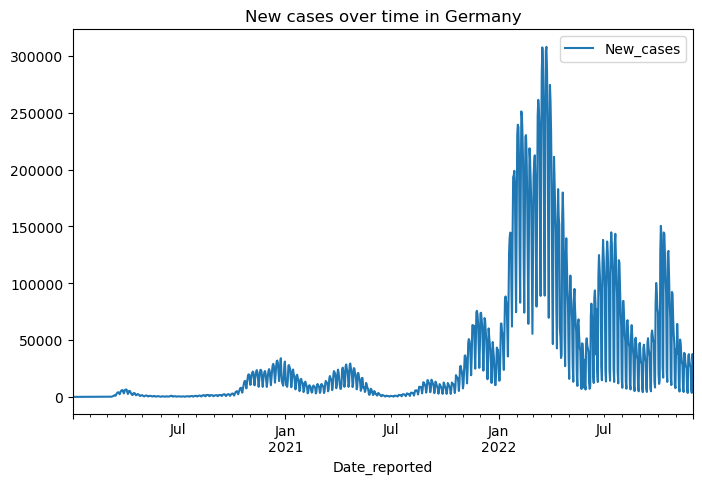

In [16]:
# Plot the 'New_cases' column against the 'Date_reported' column for the df_germany
fig,ax = plt.subplots(figsize = (8,5))
df_germany.plot('Date_reported','New_cases', ax= ax)
ax.set(title = "New cases over time in Germany")

[Text(0.5, 1.0, 'New cases over time in India')]

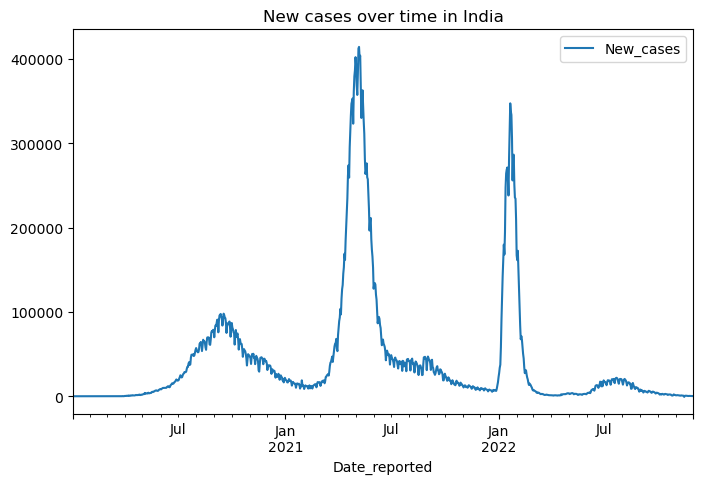

In [17]:
# Plot the 'New_cases' column against the 'Date_reported' column for the df_india
fig,ax = plt.subplots(figsize = (8,5))
df_india.plot('Date_reported','New_cases', ax= ax)
ax.set(title = "New cases over time in India")

[Text(0.5, 1.0, 'New cases over time in USA')]

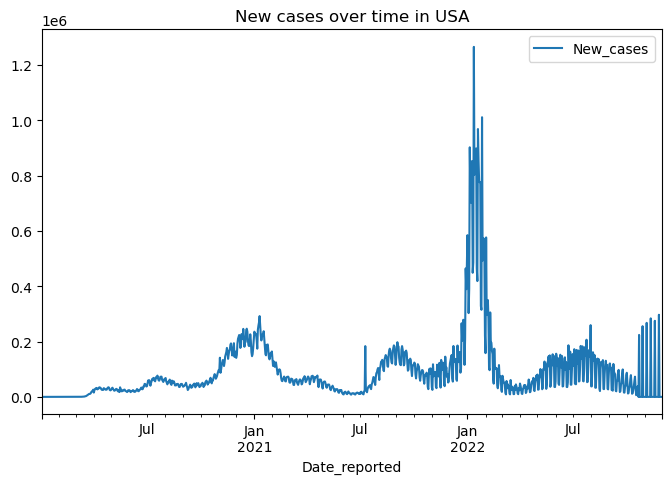

In [18]:
# Plot the 'New_cases' column against the 'Date_reported' column for the df_usa
fig,ax = plt.subplots(figsize = (8,5))
df_usa.plot('Date_reported','New_cases', ax= ax)
ax.set(title = "New cases over time in USA")

## New cases prediction in Germany


In [19]:
# Extract the 'Date_reported' and 'New_cases' columns into a new dataframe
df_germany = df_germany[['Date_reported','New_cases']]
df_germany

,Date_reported,New_cases
0,2020-01-03,0
1,2020-01-04,1
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
1058,2022-11-26,25820
1059,2022-11-27,6237
1060,2022-11-28,3494
1061,2022-11-29,37671


In [20]:
# Split the data into train and test data
train_data = df_germany[:int(len(df_germany) * 0.8)]
test_data = df_germany[int(len(df_germany) * 0.8):]

In [21]:
#Display the last five rows of the train_data
train_data.tail()

,Date_reported,New_cases
845,2022-04-27,139534
846,2022-04-28,115772
847,2022-04-29,94793
848,2022-04-30,78380
849,2022-05-01,33955


In [22]:
# Display the first five rows of the test_data
test_data.head()

,Date_reported,New_cases
850,2022-05-02,15820
851,2022-05-03,87114
852,2022-05-04,106725
853,2022-05-05,89923
854,2022-05-06,80379


In [23]:
# Get the shape of train_data and test_data
train_data.shape ,test_data.shape

((850, 2), (213, 2))

## Model Building

#### prophet model expects the dataset to be named a specific way.
#### Datatime column named: ds
#### target:y

In [24]:
# Rename the columns of the 'train_data' dataframe for use in the Prophet model
train_df = train_data.rename(columns={'Date_reported': 'ds', 'New_cases': 'y'})
train_df


,ds,y
0,2020-01-03,0
1,2020-01-04,1
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
845,2022-04-27,139534
846,2022-04-28,115772
847,2022-04-29,94793
848,2022-04-30,78380


In [25]:
%%time
# define the model
# model = Prophet(growth="linear")
# model = Prophet()
# model = Prophet(interval_width=0.95)
model = Prophet(seasonality_mode='multiplicative',changepoint_prior_scale=0.003,seasonality_prior_scale=0.05)

# fit the model
model.fit(train_df)

12:04:01 - cmdstanpy - INFO - Chain [1] start processing
12:04:01 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 337 ms, sys: 39.8 ms, total: 377 ms
Wall time: 460 ms


In [26]:
# Rename the columns of the 'test_data' dataframe for use in the Prophet model
test_df = test_data.rename(columns={'Date_reported': 'ds', 'New_cases': 'y'})


In [27]:
# Use the trained Prophet model to make predictions for the test_df
predictions = model.predict(test_df)

In [28]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-05-02,105099.578332,-4962.436363,25532.595755,105099.578332,105099.578332,-0.913073,-0.913073,-0.913073,-0.799064,-0.799064,-0.799064,-0.114009,-0.114009,-0.114009,0.0,0.0,0.0,9135.962179
1,2022-05-03,105426.112119,65860.200483,96286.792237,105426.112119,105426.112119,-0.231980,-0.231980,-0.231980,-0.107176,-0.107176,-0.107176,-0.124804,-0.124804,-0.124804,0.0,0.0,0.0,80969.369846
2,2022-05-04,105752.645907,123527.826525,155723.870321,105752.645907,105752.645907,0.322254,0.322254,0.322254,0.458116,0.458116,0.458116,-0.135862,-0.135862,-0.135862,0.0,0.0,0.0,139831.896820
3,2022-05-05,106079.179694,121659.907600,153294.544759,106079.179694,106079.179694,0.301722,0.301722,0.301722,0.448729,0.448729,0.448729,-0.147008,-0.147008,-0.147008,0.0,0.0,0.0,138085.550024
4,2022-05-06,106405.713482,111213.206138,139903.739112,106405.713482,106405.713482,0.178635,0.178635,0.178635,0.336672,0.336672,0.336672,-0.158037,-0.158037,-0.158037,0.0,0.0,0.0,125413.541101


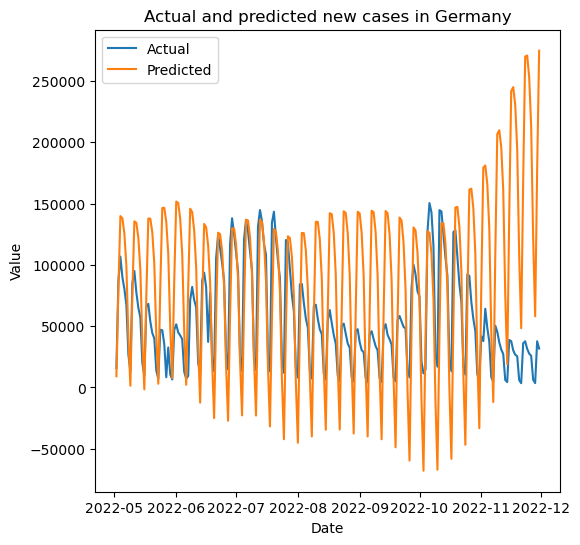

In [29]:
# Create a plot to visualize the actual and predicted values
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(predictions['ds'], predictions['yhat'], label='Predicted')
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set(title = "Actual and predicted new cases in Germany")
ax.legend()
plt.show()

In [30]:
df_cv = cross_validation(model, horizon='30 days')


  0%|          | 0/31 [00:00<?, ?it/s]

12:04:02 - cmdstanpy - INFO - Chain [1] start processing
12:04:02 - cmdstanpy - INFO - Chain [1] done processing
12:04:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
12:04:02 - cmdstanpy - INFO - Chain [1] start processing
12:04:05 - cmdstanpy - INFO - Chain [1] done processing
12:04:05 - cmdstanpy - INFO - Chain [1] start processing
12:04:05 - cmdstanpy - INFO - Chain [1] done processing
12:04:06 - cmdstanpy - INFO - Chain [1] start processing
12:04:06 - cmdstanpy - INFO - Chain [1] done processing
12:04:07 - cmdstanpy - INFO - Chain [1] start processing
12:04:07 - cmdstanpy - INFO - Chain [1] done processing
12:04:07 - cmdstanpy - INFO - Chain [1] start processing
12:04:07 - cmdstanpy - INFO - Chain [1] done processing
12:04:08 - cmdstanpy - INFO - Chain [1] start processing
12:04:08 - cmdstanpy - INFO - Chain [1] done processing
12:04:08 - cmdstanpy - INFO - Chain [1] start pro

In [31]:

r2 = round(r2_score(df_cv['y'], df_cv['yhat']),3)
r2

0.483

In [32]:
# Calculate the RMSE
rmse = round(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])),3)
print(f'RMSE: {rmse}')

RMSE: 51046.007


In [33]:
# Calculate the MAE
mae = round(mean_absolute_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAE: {mae}')


MAE: 26245.977


In [34]:
# Calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAPE: {mape}')

MAPE: 203.517


## Forecast

In [35]:

# Calculate the last day of the test data
last_day_of_test = test_df['ds'].iloc[-1]

# Calculate the dates for the forecast
future_dates = pd.date_range(start=last_day_of_test, periods=31, freq='D')

# Create a DataFrame for the forecast dates
forecast_dates = pd.DataFrame({'ds': future_dates})

# Predict the future values
forecast = model.predict(forecast_dates)
print(forecast.head())

          ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2022-11-30  174324.741263  259980.861984  291880.507519  174324.741263   
1 2022-12-01  174651.275050  255724.039258  286685.997420  174651.275050   
2 2022-12-02  174977.808838  234406.204667  264829.605461  174977.808838   
3 2022-12-03  175304.342625  188987.893121  220091.034059  175304.342625   
4 2022-12-04  175630.876413   92520.214116  123110.896154  175630.876413   

     trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0  174324.741263              0.576125                    0.576125   
1  174651.275050              0.554334                    0.554334   
2  174977.808838              0.426838                    0.426838   
3  175304.342625              0.169198                    0.169198   
4  175630.876413             -0.383465                   -0.383465   

   multiplicative_terms_upper    weekly  weekly_lower  weekly_upper    yearly  \
0                    0.576125  0.458116  

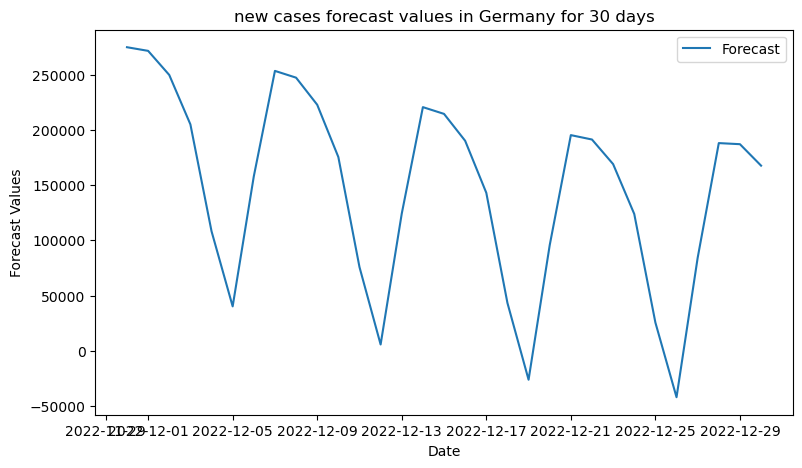

In [36]:
# Create a plot to visualize the forecast values
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(forecast_dates['ds'], forecast['yhat'], label='Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("Forecast Values")
ax.set(title = "new cases forecast values in Germany for 30 days")
ax.legend()
plt.show()


## New cases prediction in India

In [37]:
# Display the first five rows of the df_india
df_india.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
1063,2020-01-03,IN,India,SEARO,0,0
1064,2020-01-04,IN,India,SEARO,0,0
1065,2020-01-05,IN,India,SEARO,0,0
1066,2020-01-06,IN,India,SEARO,0,0
1067,2020-01-07,IN,India,SEARO,0,0


In [38]:
# Split the data into train and test sets
train_data = df_india[:int(len(df_india) * 0.8)]
test_data = df_india[int(len(df_india) * 0.8):]


In [39]:
# Get the shape of train_data and test_data
train_data.shape, test_data.shape

((850, 6), (213, 6))

## Model Building

In [40]:
# Rename the columns of the 'train_data' dataframe for use in the Prophet model
train_df = train_data.rename(columns={'Date_reported': 'ds', 'New_cases': 'y'})
train_df


,ds,Country_code,Country,WHO_region,y,Cumulative_cases
1063,2020-01-03,IN,India,SEARO,0,0
1064,2020-01-04,IN,India,SEARO,0,0
1065,2020-01-05,IN,India,SEARO,0,0
1066,2020-01-06,IN,India,SEARO,0,0
1067,2020-01-07,IN,India,SEARO,0,0
...,...,...,...,...,...,...
1908,2022-04-27,IN,India,SEARO,2927,43065496
1909,2022-04-28,IN,India,SEARO,3303,43068799
1910,2022-04-29,IN,India,SEARO,3377,43072176
1911,2022-04-30,IN,India,SEARO,3688,43075864


In [41]:
%%time
# define the model
model = Prophet(seasonality_mode='multiplicative',changepoint_prior_scale=0.1,seasonality_prior_scale=1)
# fit the model
model.fit(train_df)

12:04:36 - cmdstanpy - INFO - Chain [1] start processing
12:04:37 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 92.5 ms, sys: 11.8 ms, total: 104 ms
Wall time: 878 ms


In [42]:
# Rename the columns of the 'test_data' dataframe for use in the Prophet model
test_df = test_data.rename(columns={'Date_reported': 'ds', 'New_cases': 'y'})

In [43]:
# Use the trained Prophet model to make predictions for the test_df
predictions = model.predict(test_df)

In [44]:
# print the predictions
# predictions

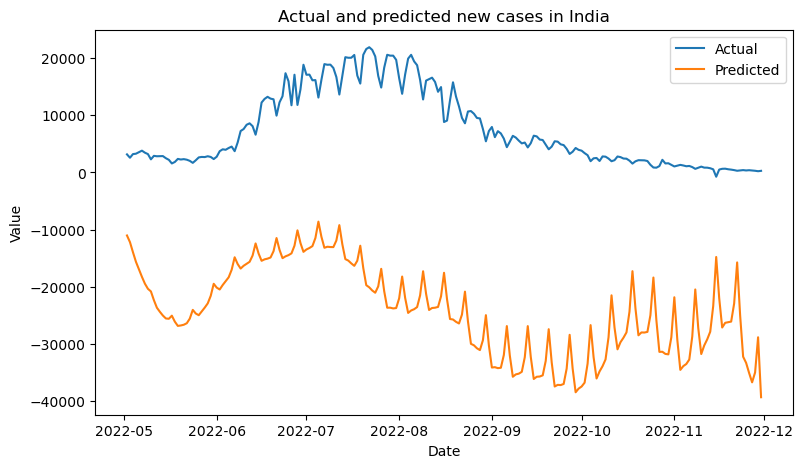

In [45]:
# Create a plot to visualize the actual and predicted values
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(predictions['ds'], predictions['yhat'], label='Predicted')
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set(title = "Actual and predicted new cases in India")
ax.legend()
plt.show()

In [46]:
df_cv = cross_validation(model, horizon='30 days')


  0%|          | 0/31 [00:00<?, ?it/s]

12:04:38 - cmdstanpy - INFO - Chain [1] start processing
12:04:38 - cmdstanpy - INFO - Chain [1] done processing
12:04:39 - cmdstanpy - INFO - Chain [1] start processing
12:04:39 - cmdstanpy - INFO - Chain [1] done processing
12:04:40 - cmdstanpy - INFO - Chain [1] start processing
12:04:40 - cmdstanpy - INFO - Chain [1] done processing
12:04:41 - cmdstanpy - INFO - Chain [1] start processing
12:04:41 - cmdstanpy - INFO - Chain [1] done processing
12:04:42 - cmdstanpy - INFO - Chain [1] start processing
12:04:42 - cmdstanpy - INFO - Chain [1] done processing
12:04:43 - cmdstanpy - INFO - Chain [1] start processing
12:04:43 - cmdstanpy - INFO - Chain [1] done processing
12:04:44 - cmdstanpy - INFO - Chain [1] start processing
12:04:44 - cmdstanpy - INFO - Chain [1] done processing
12:04:44 - cmdstanpy - INFO - Chain [1] start processing
12:04:45 - cmdstanpy - INFO - Chain [1] done processing
12:04:46 - cmdstanpy - INFO - Chain [1] start processing
12:04:46 - cmdstanpy - INFO - Chain [1]

In [47]:
# calculate the R2
r2 = round(r2_score(df_cv['y'], df_cv['yhat']),3)

In [48]:
r2

0.106

In [49]:
# Calculate the RMSE
rmse = round(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])),3)
print(f'RMSE: {rmse}')

RMSE: 94959.739


In [50]:
# Calculate the MAE
mae = round(mean_absolute_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAE: {mae}')

MAE: 54763.241


In [51]:
# Calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAPE: {mape}')

MAPE: 1102.258


## Forecast

In [52]:

# Calculate the last day of the test data
last_day_of_test = test_df['ds'].iloc[-1]

# Calculate the dates for the forecast
future_dates = pd.date_range(start=last_day_of_test, periods=31, freq='D')

# Create a DataFrame for the forecast dates
forecast_dates = pd.DataFrame({'ds': future_dates})

# Predict the future values
forecast = model.predict(forecast_dates)
print(forecast.head())

          ds          trend    yhat_lower    yhat_upper    trend_lower  \
0 2022-11-30 -123567.948227 -52347.447948 -26758.976556 -123567.948227   
1 2022-12-01 -124131.555944 -61694.201295 -34470.324897 -124131.555944   
2 2022-12-02 -124695.163661 -61821.780810 -35401.515006 -124695.163661   
3 2022-12-03 -125258.771379 -62653.337559 -36843.824884 -125258.771379   
4 2022-12-04 -125822.379096 -63470.854744 -37099.558399 -125822.379096   

     trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -123567.948227             -0.682134                   -0.682134   
1 -124131.555944             -0.619611                   -0.619611   
2 -124695.163661             -0.612349                   -0.612349   
3 -125258.771379             -0.603706                   -0.603706   
4 -125822.379096             -0.600701                   -0.600701   

   multiplicative_terms_upper    weekly  weekly_lower  weekly_upper    yearly  \
0                   -0.682134 -0.013648     -0.013648

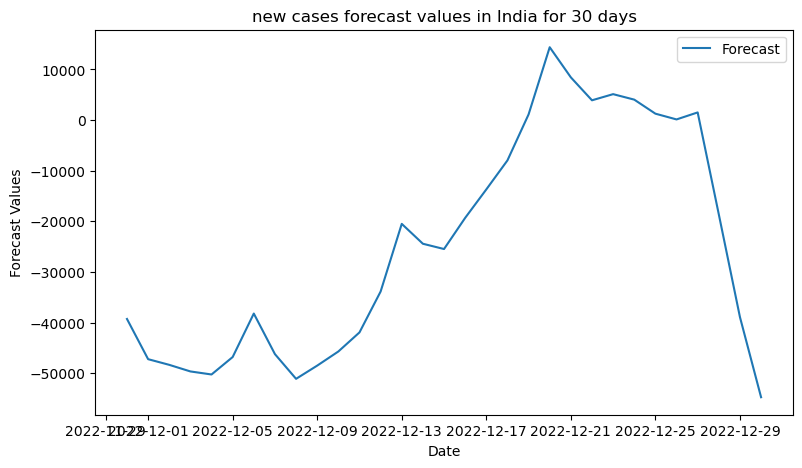

In [53]:
# Create a plot to visualize the forecast values
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(forecast_dates['ds'], forecast['yhat'], label='Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("Forecast Values")
ax.set(title = "new cases forecast values in India for 30 days")
ax.legend()
plt.show()

# New cases prediction and forecast in USA

In [54]:
df_usa

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
2126,2020-01-03,US,United States of America,AMRO,0,0
2127,2020-01-04,US,United States of America,AMRO,0,0
2128,2020-01-05,US,United States of America,AMRO,0,0
2129,2020-01-06,US,United States of America,AMRO,0,0
2130,2020-01-07,US,United States of America,AMRO,0,0
...,...,...,...,...,...,...
3184,2022-11-26,US,United States of America,AMRO,0,97329491
3185,2022-11-27,US,United States of America,AMRO,0,97329491
3186,2022-11-28,US,United States of America,AMRO,0,97329491
3187,2022-11-29,US,United States of America,AMRO,0,97329491


In [55]:
# Split the data into train and test sets
train_data = df_usa[:int(len(df_usa) * 0.8)]
test_data = df_usa[int(len(df_usa) * 0.8):]


In [56]:
# Get the shape of train_data and test_data
train_data.shape ,test_data.shape

((850, 6), (213, 6))

# Model Building

In [57]:
# Rename the columns of the 'train_data' dataframe for use in the Prophet model
train_df = train_data.rename(columns={'Date_reported': 'ds', 'New_cases': 'y'})
train_df


,ds,Country_code,Country,WHO_region,y,Cumulative_cases
2126,2020-01-03,US,United States of America,AMRO,0,0
2127,2020-01-04,US,United States of America,AMRO,0,0
2128,2020-01-05,US,United States of America,AMRO,0,0
2129,2020-01-06,US,United States of America,AMRO,0,0
2130,2020-01-07,US,United States of America,AMRO,0,0
...,...,...,...,...,...,...
2971,2022-04-27,US,United States of America,AMRO,49858,80341913
2972,2022-04-28,US,United States of America,AMRO,64414,80406327
2973,2022-04-29,US,United States of America,AMRO,77145,80483472
2974,2022-04-30,US,United States of America,AMRO,61915,80545387


In [58]:
%%time
# define the model
model = Prophet(seasonality_mode='multiplicative',changepoint_prior_scale=0.006)
# model = Prophet(seasonality_mode='multiplicative',changepoint_prior_scale=0.1,seasonality_prior_scale=1)
# model = Prophet(changepoint_prior_scale=0.05)

# fit the model
model.fit(train_df)

12:05:17 - cmdstanpy - INFO - Chain [1] start processing
12:05:17 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 94 ms, sys: 7.7 ms, total: 102 ms
Wall time: 175 ms


In [59]:
# Rename the columns of the 'test_data' dataframe for use in the Prophet model
test_df = test_data.rename(columns={'Date_reported': 'ds', 'New_cases': 'y'})
# Use the trained Prophet model to make predictions for the test_df
predictions = model.predict(test_df)

In [60]:
# print the predictions
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-05-02,198169.210164,-39312.444490,98518.070666,198169.210164,198169.210164,-0.867731,-0.867731,-0.867731,-0.311093,-0.311093,-0.311093,-0.556638,-0.556638,-0.556638,0.0,0.0,0.0,26211.600425
1,2022-05-03,198474.027395,-60761.226443,88024.670695,198474.027395,198474.027395,-0.914545,-0.914545,-0.914545,-0.371790,-0.371790,-0.371790,-0.542755,-0.542755,-0.542755,0.0,0.0,0.0,16960.637490
2,2022-05-04,198778.844626,73008.997181,214231.463798,198778.844626,198778.844626,-0.285194,-0.285194,-0.285194,0.244934,0.244934,0.244934,-0.530128,-0.530128,-0.530128,0.0,0.0,0.0,142088.361884
3,2022-05-05,199083.661858,34238.235990,179955.349318,199083.661858,199083.661858,-0.479789,-0.479789,-0.479789,0.039161,0.039161,0.039161,-0.518950,-0.518950,-0.518950,0.0,0.0,0.0,103565.577093
4,2022-05-06,199388.479089,43094.713317,190130.586536,199388.479089,199388.479089,-0.403276,-0.403276,-0.403276,0.106102,0.106102,0.106102,-0.509378,-0.509378,-0.509378,0.0,0.0,0.0,118979.940675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2022-11-26,261571.194299,244904.259456,391799.627529,259314.507239,263802.817947,0.224179,0.224179,0.224179,0.163054,0.163054,0.163054,0.061125,0.061125,0.061125,0.0,0.0,0.0,320209.979139
209,2022-11-27,261876.011530,244534.409707,391839.135639,259606.720201,264123.165918,0.207642,0.207642,0.207642,0.129632,0.129632,0.129632,0.078010,0.078010,0.078010,0.0,0.0,0.0,316252.563447
210,2022-11-28,262180.828762,136313.943638,275592.090522,259898.957482,264442.275091,-0.219229,-0.219229,-0.219229,-0.311093,-0.311093,-0.311093,0.091864,0.091864,0.091864,0.0,0.0,0.0,204703.210870
211,2022-11-29,262485.645993,119146.861781,262133.411591,260189.418967,264760.991414,-0.269417,-0.269417,-0.269417,-0.371790,-0.371790,-0.371790,0.102372,0.102372,0.102372,0.0,0.0,0.0,191767.437426


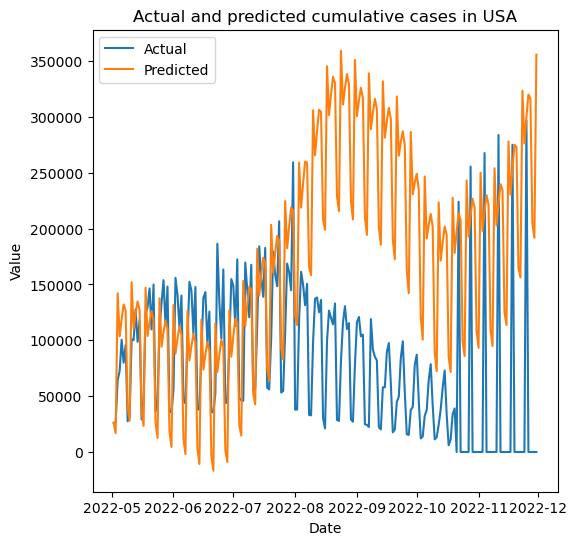

In [61]:
# Create a plot to visualize the actual and predicted values
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(predictions['ds'], predictions['yhat'], label='Predicted')
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set(title = "Actual and predicted cumulative cases in USA")
ax.legend()
plt.show()

In [62]:
df_cv = cross_validation(model, horizon='30 days')


  0%|          | 0/31 [00:00<?, ?it/s]

12:05:18 - cmdstanpy - INFO - Chain [1] start processing
12:05:18 - cmdstanpy - INFO - Chain [1] done processing
12:05:18 - cmdstanpy - INFO - Chain [1] start processing
12:05:18 - cmdstanpy - INFO - Chain [1] done processing
12:05:19 - cmdstanpy - INFO - Chain [1] start processing
12:05:19 - cmdstanpy - INFO - Chain [1] done processing
12:05:20 - cmdstanpy - INFO - Chain [1] start processing
12:05:20 - cmdstanpy - INFO - Chain [1] done processing
12:05:20 - cmdstanpy - INFO - Chain [1] start processing
12:05:20 - cmdstanpy - INFO - Chain [1] done processing
12:05:21 - cmdstanpy - INFO - Chain [1] start processing
12:05:21 - cmdstanpy - INFO - Chain [1] done processing
12:05:21 - cmdstanpy - INFO - Chain [1] start processing
12:05:21 - cmdstanpy - INFO - Chain [1] done processing
12:05:22 - cmdstanpy - INFO - Chain [1] start processing
12:05:22 - cmdstanpy - INFO - Chain [1] done processing
12:05:23 - cmdstanpy - INFO - Chain [1] start processing
12:05:23 - cmdstanpy - INFO - Chain [1]

In [63]:
# calculate R-squared value
r2 = round(r2_score(df_cv['y'], df_cv['yhat']),3)

In [64]:
r2

0.173

In [65]:
# Calculate the RMSE
rmse = round(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])),3)
print(f'RMSE: {rmse}')

RMSE: 155365.244


In [66]:
# Calculate the MAE
mae = round(mean_absolute_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAE: {mae}')


MAE: 102766.846


In [67]:
#  Calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAPE: {mape}')

MAPE: 191.525


## Forecast

In [68]:
# Calculate the last day of the test data
last_day_of_test = test_df['ds'].iloc[-1]

# Calculate the dates for the forecast
future_dates = pd.date_range(start=last_day_of_test, periods=31, freq='D')

# Create a DataFrame for the forecast dates
forecast_dates = pd.DataFrame({'ds': future_dates})

# Predict the future values
forecast = model.predict(forecast_dates)
print(forecast.head())


          ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2022-11-30  262790.463224  282537.077808  428537.486149  262790.463224   
1 2022-12-01  263095.280456  224225.440028  368399.690801  263095.280456   
2 2022-12-02  263400.097687  250447.339818  389319.368023  263400.097687   
3 2022-12-03  263704.914919  267579.373811  407057.204670  263704.914919   
4 2022-12-04  264009.732150  256772.644923  395339.474025  264009.732150   

     trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0  262790.463224              0.354250                    0.354250   
1  263095.280456              0.151756                    0.151756   
2  263400.097687              0.218334                    0.218334   
3  263704.914919              0.271439                    0.271439   
4  264009.732150              0.230991                    0.230991   

   multiplicative_terms_upper    weekly  weekly_lower  weekly_upper    yearly  \
0                    0.354250  0.244934  

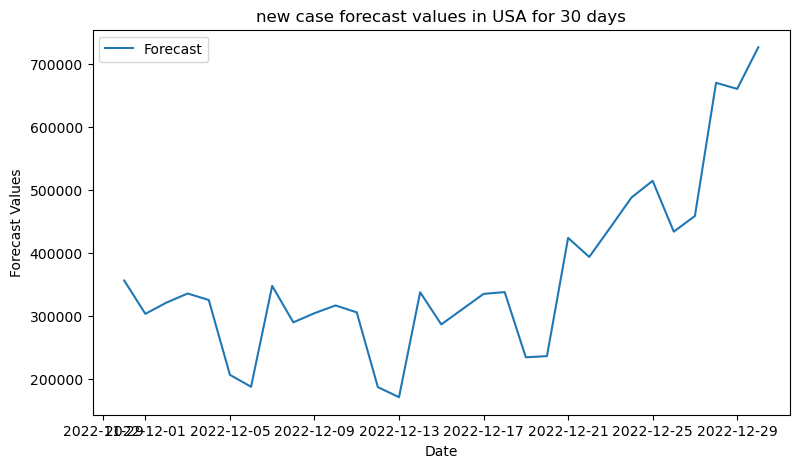

In [69]:
# Create a plot to visualize the forecast values
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(forecast_dates['ds'], forecast['yhat'], label='Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("Forecast Values")
ax.set(title = "new case forecast values in USA for 30 days")
ax.legend()
plt.show()